In [1]:
from scipy import io
import numpy as np
import pandas as pd

from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard

matlab = matlab_reader('AIRS_125KM_2022/20220101_AIRS_3DST-1_125km_grid.mat')
# matlab = matlab_reader('AIRS_40KM_2022/20220101_AIRS_3DST-1_40km_grid.mat')

grid = map_grid(grid_size=125)
wizard = data_wizard()


In [4]:
temp_data = matlab.select(
    hemisphere= 'sh',
    data_field='tp',
    daytime='night',
    altitude=36)   
    
select_area_indexer = grid.select_area_indexer(
    min_lat= -34,
    max_lat= -22,
    min_lon= -74,
    max_lon= -63)

data = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = temp_data)

(161, 161)


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(10, 8))

m = Basemap(projection='stere', resolution='c',
            width=8E6, height=8E6, 
            lat_0=-34, lat_1=-22,
            lon_0=-74,lon_1 = -22)

m.shadedrelief(scale=0.5)

m.pcolormesh(grid.sh_lon, 
             grid.sh_lat, 
             data,
             latlon=True, cmap='RdBu_r',
             shading='auto')

m.drawcoastlines(linewidth=0.5,linestyle='solid')
m.drawcountries(linewidth=0.5, linestyle='solid',color='k')
plt.clim(-2, 2)

plt.title('Temperature')
plt.colorbar(label='Temperature in (°C)')

In [15]:
from os import listdir
from os.path import isfile, join
from datetime import datetime

year = '2018'
def extract_date(filename):
    date_string = filename.split("_")[0]
    date_obj = datetime.strptime(date_string, '%Y%m%d')
    return date_obj.date()

FILES = np.sort(listdir(f'AIRS_40KM_{year}/'))
FILES_DATE = [extract_date(file) for file in FILES]

In [13]:
means = []
for file in FILES:
    try:
        matlab = matlab_reader(f'AIRS_40KM_{year}/' + file)
        full_data = matlab.select(
            hemisphere= 'nh',
            data_field='bg',
            daytime='night',
            altitude=36)   
            
        select_area_indexer = grid.select_area_indexer(
            min_lat= 60,
            max_lat= 90,
            min_lon= -180,
            max_lon= 180)

        selected_data = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = full_data)
        mean = dataset(selected_data).mean
        means.append(mean)
    except:
        pass


(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)
(501, 501)


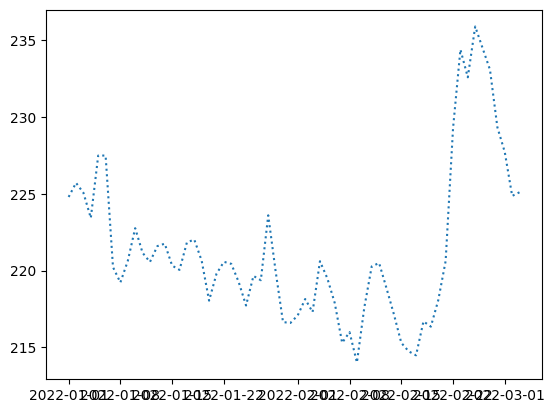

In [14]:
import matplotlib.pyplot as plt
import numpy as np
y = means
x = FILES_DATE[:len(means)]
plt.plot(x,y, linestyle = 'dotted')
plt.show()

In [16]:
len(means)

61

In [18]:
FILES_DATE

[datetime.date(2018, 1, 3),
 datetime.date(2018, 1, 5),
 datetime.date(2018, 1, 6),
 datetime.date(2018, 1, 7),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 12),
 datetime.date(2018, 1, 13),
 datetime.date(2018, 1, 14),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 1, 16),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 22),
 datetime.date(2018, 1, 25),
 datetime.date(2018, 1, 28),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 1, 31),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 6),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 11),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 15),
 datetime.date(2018, 2, 17),
 datetime.date(2018, 2, 18),
 datetime.date(2018, 2, 19),
 datetime.date(2018, 2, 20),
 datetime.date(2018, 2, 21),
 datetime.date(2018, 2, 22